In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import klib

# Data Load and Reading

In [3]:
data = pd.read_csv("ai4i2020.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


 Feature : Air temperature is our independent variables and all others are dependent variables.
 Here we need to find out the Air temperature W.r.t. different given data points

In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

# Data Preparation

In [6]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

NO Missing value present in the Dataset

ProductID is directly representing the different product under Type hence we can say that there is clear representation of data can be done by any of one column. hence for simplicity we can drop Product ID column. 

UDI: No. of record which either can be use as index or simply drop it. 

In [7]:
data.drop(columns = ['UDI', "Product ID"], inplace = True)

Data is normally distributed, with different mean and S.D. 
hence Standardisation is important before proceeding with model building

In [8]:
data.describe(percentiles = (0.25, 0.50, 0.65, 0.75, 0.85, 0.90, 0.95, 0.99))

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
65%,300.800000,310.700000,1561.000000,44.000000,141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
85%,302.300000,311.600000,1685.000000,50.200000,184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
90%,302.700000,311.900000,1746.000000,52.600000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


# EDA: 

### Label Encoding: 
As Linear Regression only accept the independent variables as Numeric data type so it is important to convert the Type feature from object to Numeric and for that we can use either of approach as : 
1. Label Encoding: Encode the data values to new values 
2. Dummy variable: for more than 2 data value type we can use dummy vairiables concept. 

As of Now we will go with Label Encoding for example: 
L = 0
M = 1
H = 2

In [9]:
# Label Encoding : 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])


In [10]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### dummy variable of Type
* status = pd.get_dummies(data['Type'])
* status = pd.get_dummies(data['Type'], drop_first = True)
* data = pd.concat([data, status], axis = 1)
* data.head()

In [11]:
# lets do the Profile report
profile = ProfileReport(data)
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Observation : 
1. Variable Tab : we can see that the data data distribution is mostly follow the Normal Distribution and there is not outliers available as the max and mini values distribution is not shwoing any distinction points. Outliers review we already has done with before with percentiles values and found that its normal without any outliers. 

2. Interaction and Correlation Tab : there are some variable which are highly correlated with each other this we can see later with the valueannotation as well. 

3. Missing Value Tab : There is no Missing value in the data frame
4. Overview Tab : there are total 12 variable out of which 7 are categorical (0s, 1s and 2s) and 5 Numeric Columns.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

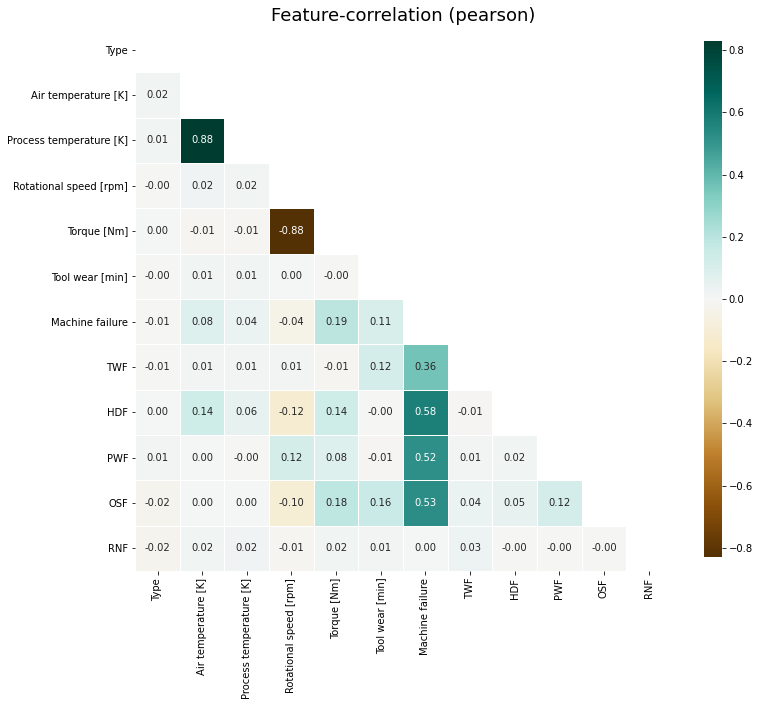

In [12]:
klib.corr_plot(data)

There is a very high correlation between Process Temperature ans Air Temperature features. 
There is very high Negative correlation between Torque and Rotational Speed features

we can think about this during our Model building and can exclude either of them from model.

In [13]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Column Names has Space in between, To make job easier I am renaming the space from column name. 
this step is not very much important and depends on indiviual choice

In [14]:
data.columns = ['Type', 'AirTemperature', 'ProcessTemperature',
       'RotationalSpeed', 'Torque', 'ToolWear',
       'MachineFailure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [15]:
data.head()

,Type,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


##### Data Standardisation process: 
As we can see the data is normally distributed but the scaling is required for the Numeric features. 

In [16]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [17]:
X = ["AirTemperature", "ProcessTemperature", "RotationalSpeed", "Torque", "ToolWear"]
data[X] = scale.fit_transform(data[X])

In [18]:
data

,Type,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,0,0,0,0
9996,0,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0,0,0,0
9997,2,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,0,0,0,0
9998,0,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0,0,0,0


### Train Test Split

In [19]:
# train_test split
Y = data["AirTemperature"]
X = data.drop(['AirTemperature'], 1)

In [20]:
X = data.drop(['AirTemperature'], 1)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [21]:
X.head()

,Type,ProcessTemperature,RotationalSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,2,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,1,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,1,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,1,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,1,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0


In [22]:
Y

0      -0.952389
1      -0.902393
2      -0.952389
3      -0.902393
4      -0.902393
          ...   
9995   -0.602417
9996   -0.552421
9997   -0.502425
9998   -0.502425
9999   -0.502425
Name: AirTemperature, Length: 10000, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3, random_state= 42)

In [24]:
X_train

,Type,ProcessTemperature,RotationalSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
9069,2,-1.216963,0.776593,-1.192455,0.393537,0,0,0,0,0,0
2603,2,-0.542955,-1.142245,0.633308,-1.208953,0,0,0,0,0,0
7738,2,1.344270,-1.538284,2.087899,0.597776,0,0,0,0,0,0
1579,1,-1.149563,-0.528663,0.382516,1.069096,0,0,0,0,0,0
5058,1,1.950878,-0.071265,0.252105,1.351888,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,1,1.209468,-0.947014,1.626443,1.571838,1,0,0,0,1,0
5191,1,2.153081,-0.684847,0.603213,0.314983,0,0,0,0,0,0
5390,0,1.546473,-0.311120,0.723593,1.807498,0,0,0,0,0,0
860,0,-2.093175,0.012405,-0.741030,-1.177531,0,0,0,0,0,0


In [25]:
Y_train

9069   -1.402354
2603   -0.352437
7738    0.247515
1579   -0.852397
5058    1.947381
          ...   
5734    1.147444
5191    1.997377
5390    1.397424
860    -1.952310
7270    0.097527
Name: AirTemperature, Length: 7000, dtype: float64

# Model Building: 

RFE : Recursive Feature Eleminaiton is one of the method of feature Selection to help us to choose the right column in the beginning. Here we can Choose the no. of columns 
* No. of Feature Columns = 10

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 2)             # running RFE
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[('Type', False, 6),
 ('ProcessTemperature', True, 1),
 ('RotationalSpeed', False, 8),
 ('Torque', False, 9),
 ('ToolWear', False, 10),
 ('MachineFailure', False, 4),
 ('TWF', False, 2),
 ('HDF', True, 1),
 ('PWF', False, 3),
 ('OSF', False, 7),
 ('RNF', False, 5)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['ProcessTemperature', 'HDF'], dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['Type', 'RotationalSpeed', 'Torque', 'ToolWear', 'MachineFailure',
       'TWF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [29]:
import statsmodels.api as sm  

In [30]:
col = X_train.columns[rfe.support_]
col
X_train_rfe = sm.add_constant(X_train[col])
lm_rfe = sm.OLS(Y_train,X_train_rfe).fit()
lm_rfe.summary()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AirTemperature   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:18:06   Log-Likelihood:                -4650.1
No. Observations:                7000   AIC:                             9306.
Df Residuals:                    6997   BIC:                             9327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0094      0.006     -1.667      0.095      -0.021       0.002
ProcessTemperature     0.8668      0.006    154.635      0.000       0.856       0.878
HDF                    0.8418      0.050     16.844      0.000       0.744       0.940
==============================================================================
Omnibus:                      482.834   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.267
Skew:                          -0.098   Prob(JB):                     5.30e-39
Kurtosis:                       2.248   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression.**

**As per general Practice the VIF must not be more than 5 for any variable and in such cases we can drop the variable but for that there are some other factor also need to considered**

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,ProcessTemperature,1.0
1,HDF,1.0


* After lots of Trial and error we came to this conclusion as below and we cross check the same with RFE method as well. 
* Even after the good VIF for some features the P value was too high ~ 0.2 hence we removed all columns and make the model with just 2 feautres

In [33]:
X_train_col = X_train.drop(['ToolWear', 'MachineFailure', "Torque", 'RNF', 'PWF', 'TWF', 'OSF', 'Type', 'RotationalSpeed'], 1)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [34]:

import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_col)
lm1 = sm.OLS(Y_train,X_train_col).fit()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         AirTemperature   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.778
Method:                 Least Squares   F-statistic:                          1.229e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:18:52   Log-Likelihood:                         -4651.5
No. Observations:                7000   AIC:                                      9307.
Df Residuals:                    6998   BIC:                                      9321.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
ProcessTemperature     0.8668      0.006    154.624      0.000       0.856       0.878
HDF                    0.8324      0.050     16.761      0.000       0.735       0.930
==============================================================================
Omnibus:                      482.598   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.354
Skew:                          -0.099   Prob(JB):                     5.07e-39
Kurtosis:                       2.248   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,ProcessTemperature,1.0
1,HDF,1.0


In [36]:
X_train_lm1

,const,ProcessTemperature,HDF
9069,1.0,-1.216963,0
2603,1.0,-0.542955,0
7738,1.0,1.344270,0
1579,1.0,-1.149563,0
5058,1.0,1.950878,0
...,...,...,...
5734,1.0,1.209468,0
5191,1.0,2.153081,0
5390,1.0,1.546473,0
860,1.0,-2.093175,0


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [37]:
y_train_pred = lm_rfe.predict(X_train_rfe)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

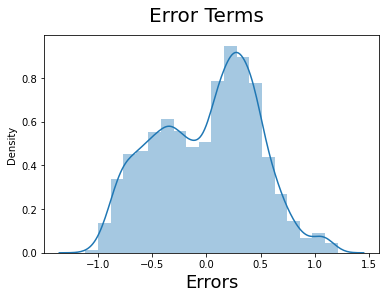

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [39]:
## Making Predictions
X_test_col = X_test.drop(['ToolWear', 'MachineFailure', "Torque", 'RNF', 'PWF', 'TWF', 'OSF', 'Type', 'RotationalSpeed'], 1)
X_test_rfe = sm.add_constant(X_test_col)
y_pred = lm_rfe.predict(X_test_rfe)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

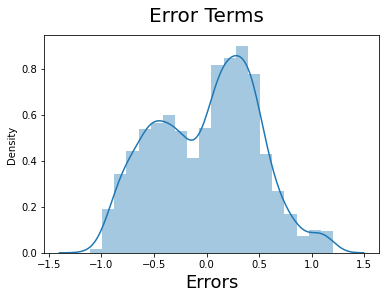

In [40]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [89]:
lm_rfe.rsquared

0.778885860170339

In [90]:
import numpy as np
lm_rfe.rsquared(X_test, Y_test)

TypeError: 'numpy.float64' object is not callable

# Model Evaluation


Text(0, 0.5, 'y_pred')

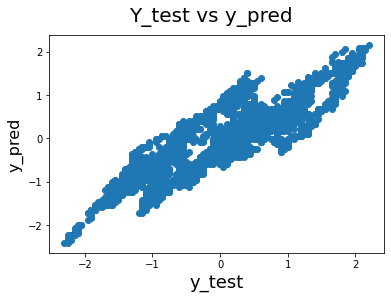

In [43]:
# Plotting y_test and y_pred to understand the spread.


fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('Y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18, )                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Hyperparameter Tuning: Regularisation
1. Hold Out Method
2. CV: K fold
3. Ridge
4. Lasso
5. Elastic net

1. #### HoldOut Method

In [64]:
Y = data["AirTemperature"]
X = data.drop(['AirTemperature'], 1)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.20, random_state= 42)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 2)             # running RFE
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


[('Type', False, 5),
 ('ProcessTemperature', True, 1),
 ('RotationalSpeed', False, 7),
 ('Torque', False, 9),
 ('ToolWear', False, 10),
 ('MachineFailure', False, 4),
 ('TWF', False, 3),
 ('HDF', True, 1),
 ('PWF', False, 2),
 ('OSF', False, 6),
 ('RNF', False, 8)]

In [77]:
col = X_train.columns[rfe.support_]
col
X_train_rfe = sm.add_constant(X_train[col])
X_train_rfe.drop(['const'], 1, inplace = True)
lm_rfe_HO = sm.OLS(Y_train,X_train_rfe).fit()
lm_rfe_HO.summary()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         AirTemperature   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                          1.408e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                        0.00
Time:                        23:45:20   Log-Likelihood:                         -5324.1
No. Observations:                8000   AIC:                                  1.065e+04
Df Residuals:                    7998   BIC:                                  1.067e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
ProcessTemperature     0.8717      0.005    165.628      0.000       0.861       0.882
HDF                    0.8322      0.048     17.470      0.000       0.739       0.926
==============================================================================
Omnibus:                      509.926   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.196
Skew:                          -0.089   Prob(JB):                     3.04e-42
Kurtosis:                       2.264   Cond. No.                         9.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Cross Validation: K-Folds with Lasso

In [82]:
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression

In [104]:
lassocv = LassoCV(alphas=None,cv= 5 , max_iter=200000, normalize=True)
lassocv.fit(X_train[col],Y_train)

LassoCV(cv=5, max_iter=200000, normalize=True)

In [105]:
col_test = X_test.columns[rfe.support_]
col_test
lassocv.score(X_test[col_test],Y_test)

0.7609008150936618

In [106]:
lassocv.score(X_train[col],Y_train)

0.7788844035807402

#### Ridge

In [107]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10 , normalize=True)
ridgecv.fit(X_train[col],Y_train)

RidgeCV(alphas=array([2.22437872, 7.03567385, 0.76100227, 4.15469112, 7.32238622,
       7.30328259, 4.76497263, 9.43904826, 2.9713333 , 2.27168007,
       7.79202631, 4.39410383, 8.23200747, 4.9597772 , 3.21214663,
       4.49036749, 9.59862101, 2.90641409, 4.63536254, 3.38805291,
       9.86534074, 6.27053314, 6.94732895, 5.21988731, 7.31480393,
       2.7019225 , 8.61209791, 5.86269808, 0.14506054, 7.07866671,
       3.44145181, 2.54785842, 6.0176993 , 0.29841409, 0.12449165,
       5.1615827 , 7.08447244, 6.95583344, 0.713299  , 4.62011283,
       0.50068896, 0.77055215, 4.13848374, 4.79198528, 0.60776905,
       9.26449614, 0.40264633, 2.79394942, 8.50961193, 4.35504813]),
        cv=10, normalize=True)

In [108]:
ridgecv.alpha_

0.1244916483059777

In [109]:
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(X_train[col],Y_train)
ridge_lr.score(X_train[col],Y_train)

0.7788858460555566

In [110]:
ridge_lr.score(X_test[col_test],Y_test)

0.7608872766215973

#### ELasticNet

In [111]:
elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(X_train[col],Y_train)

ElasticNetCV(cv=10)

In [112]:
elastic.alpha_

0.0017603703507106303

In [113]:
elastic.l1_ratio

0.5

In [114]:
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)

In [115]:
elastic_lr.fit(X_train[col],Y_train)

ElasticNet(alpha=0.0017603703507106303)

In [116]:
elastic_lr.score(X_test[col_test],Y_test)

0.760942230525642

** Here we can see that the model performance is same in all the factors and we find the best model prediction with the Hold Out Hyperparameter tuning. hence we will use the same for our prediction

In [118]:
# saving the model to the local file system
filename = 'PredMaintainence_model.pickle'
pickle.dump(lm_rfe_HO, open(filename, 'wb'))

# result

In [119]:
# prediction using the saved model
model = pickle.load(open(filename, 'rb'))
a1=model.predict([[390, 1]])
a1

array([340.7858627])

In [120]:
model = pickle.load(open(filename, 'rb'))
a1=model.predict([[308.6, 0]])
a1

array([268.99920819])

In [121]:
model = pickle.load(open(filename, 'rb'))
a1=model.predict([[310, 1]])
a1

array([271.05178411])

In [126]:
data.head()

,Type,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,MachineFailure,TWF,HDF,PWF,OSF,RNF
0,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0
1,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0
2,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0
3,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0
4,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0


In [122]:
pd. __version__

'1.3.2'